# Exercise 04 ANN for Regression - Assignment

<span style="color:red">**The submission deadline of this assignment is 09/04/2024 23:59. In addition to the executed Jupyter Notebook, please also submit the saved `.pth` file of the trained ANN on Learn.**</span>

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Requirement

In this assignment, you are required to build a regression model using ANN.

The problem to be solved is predicting the price of houses in California.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Build the data pipeline
- Create a non-linear multi-layer ANN
- Train the ANN
- Save and load the trained model
- Make predictions and evaluation

### Import libraries

In [6]:
# [TBC] complete your code here with proper comments
# import the necessary libraries
import warnings

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [4]:
# [TBC] complete your code here with proper comments
# suppress all warnings
warnings.filterwarnings("ignore")

## Task 1. Build the data pipeline

<span style="color:red">**[TBC]**</span> You need to:
- Use `sklearn.datasets.fetch_california_housing()` to load California Housing dataset
- Pre-process the dataset
    - Scale numerical features with [min-max scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- Divide the dataset into the training and test set
- Create `TensorDataset` instances to store the dataset
- Create `DataLoader` instance to wrap the dataset as iterable objects
    - Decide a proper batch size considering
        - The available memory of your computer
        - The desired number of batches in each epoch

In [11]:
# [TBC] complete your code here with proper comments

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Pre-process the dataset with Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Divide the dataset into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

# Create DataLoader instances
batch_size = 64  # Adjust based on system's specification 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data pipeline setup complete!")

# get a minibatch from the data loader and print shape of feature and label
for (X, y) in train_loader:
    print(X.shape)
    print(y.shape)
    break

for (X, y) in test_loader:
    print(X.shape)
    print(y.shape)
    break


Data pipeline setup complete!
torch.Size([64, 8])
torch.Size([64])
torch.Size([64, 8])
torch.Size([64])


## Task 2. Create a non-linear multi-layer ANN

<span style="color:red">**[TBC]**</span> You need to:
- Create a custom class to define the structure of the network
- Create an instance of this class as the ANN

In [12]:
# [TBC] complete your code here with proper comments
import torch.nn as nn
import torch.nn.functional as F

# Step 1: Define the network structure
class HousePriceNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(HousePriceNet, self).__init__()
        # Initialize the layers
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        self.hidden_layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]) for i in range(len(hidden_sizes) - 1)])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        # Forward pass through the hidden layers with ReLU activation
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        # Output layer
        x = self.output_layer(x)
        return x

# Step 2: Create an instance of the ANN
input_size = X_train.shape[1]  # Number of features in the dataset
hidden_sizes = [128, 64]  # Sizes of the hidden layers
output_size = 1  # Output size (predicting one value)

# Create the network instance
model = HousePriceNet(input_size, hidden_sizes, output_size)

print("Model structure created:")
print(model)


Model structure created:
HousePriceNet(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
  )
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)


## Task 3. Train the ANN

<span style="color:red">**[TBC]**</span> You need to:
- Define a `train()` function
- Specify traing hyper-parameters:
    - the loss function
    - the optimizer
    - the learning rate
    - the number of epoches to train
- Train the ANN
    - Adjust the training hyper-parameters if necessary to get a good result
- Plot the loss history of the training process

Epoch 1/5, Loss: 0.3083425760269165


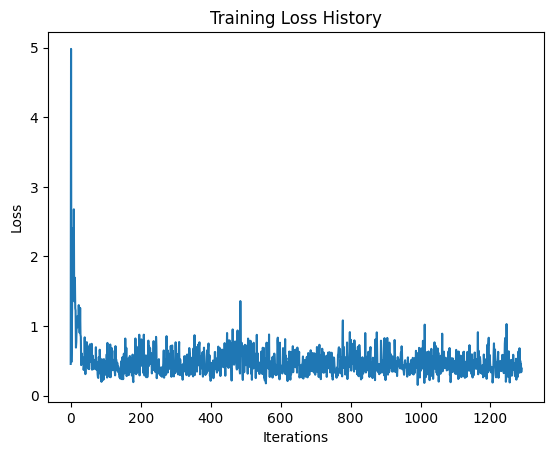

In [20]:
# [TBC] complete your code here with proper comments
import torch.optim as optim
import matplotlib.pyplot as plt

def train(model, train_loader, loss_function, optimizer, num_epochs):
    model.train()  # Set the model to training mode
    loss_history = []

    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = loss_function(outputs, targets.unsqueeze(1))  # Make sure the target shape matches output

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    return loss_history

# Hyperparameters
learning_rate = 0.2 # Lower due to capacity of personal computer
num_epochs = 5 # Lower due to capacity of personal computer

# Loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
loss_history = train(model, train_loader, loss_function, optimizer, num_epochs)

# Plot the loss history
plt.plot(loss_history)
plt.title('Training Loss History')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


## Task 4. Save and load the trained model

<span style="color:red">**[TBC]**</span> You need to:
- Save the trained model
    - <span style="color:red">**Don't forget to include the saved file in your submission.**</span>
- Re-create the neural network and load the saved model

In [21]:
# [TBC] complete your code here with proper comments
# Step 1: Save the trained model
# Look at file path

model_save_path = r'C:\Users\Jhonnatan\Documents\GitHub\ScikitLearn_Machine-Learning\ML Guides - Tianyuan ZHANG ML Course\Deep_Learning\model.pth'
torch.save(model.state_dict(), model_save_path)

print("Model saved successfully!")


Model saved successfully!


In [22]:
# Step 2: Re-create the neural network
# Make sure the architecture is the same as the model you trained
model_loaded = HousePriceNet(input_size, hidden_sizes, output_size)

# Step 3: Load the saved model
# When loading the model
model_load_path = r'C:\Users\Jhonnatan\Documents\GitHub\ScikitLearn_Machine-Learning\ML Guides - Tianyuan ZHANG ML Course\Deep_Learning\model.pth'
model_loaded.load_state_dict(torch.load(model_load_path))

print("Model loaded successfully!")

Model loaded successfully!


In [25]:
# Provide a link to download the saved model file
import os

# Use your provided file path
local_file_path = r'C:\Users\Jhonnatan\Documents\GitHub\ScikitLearn_Machine-Learning\ML Guides - Tianyuan ZHANG ML Course\Deep_Learning\model.pth'

# Check if the file exists
if os.path.isfile(local_file_path):
    print("The saved model file path is: " + local_file_path)
else:
    print("Model file not found. Please check the file path.")


The saved model file path is: C:\Users\Jhonnatan\Documents\GitHub\ScikitLearn_Machine-Learning\ML Guides - Tianyuan ZHANG ML Course\Deep_Learning\model.pth


## Task 5. Make predictions and evaluation

<span style="color:red">**[TBC]**</span> You need to:
- Define the `test()` function
- Make predictions on the test dataset
- Evaluate the performance
    - Compute RMSE and print it
    - Compute &R^2& score and print it
- Plot the predictions vs. target values

In [26]:
# [TBC] complete your code here with proper comments
from sklearn.metrics import mean_squared_error, r2_score

def test(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []
    
    with torch.no_grad():  # No need to track the gradients
        for inputs, targets in test_loader:
            # Make predictions
            outputs = model(inputs)
            
            # Store predictions and actual values
            predictions.extend(outputs.numpy())
            actuals.extend(targets.numpy())
    
    # Calculate the performance metrics
    predictions = np.array(predictions).flatten()
    actuals = np.array(actuals).flatten()
    rmse = mean_squared_error(actuals, predictions, squared=False)
    r2 = r2_score(actuals, predictions)
    
    return predictions, actuals, rmse, r2

# Make predictions and evaluate
predictions, actuals, rmse, r2 = test(model_loaded, test_loader)

# Print the performance metrics
print(f'RMSE: {rmse}')
print(f'R² score: {r2}')

RMSE: 0.711085319519043
R² score: 0.6141339632412042


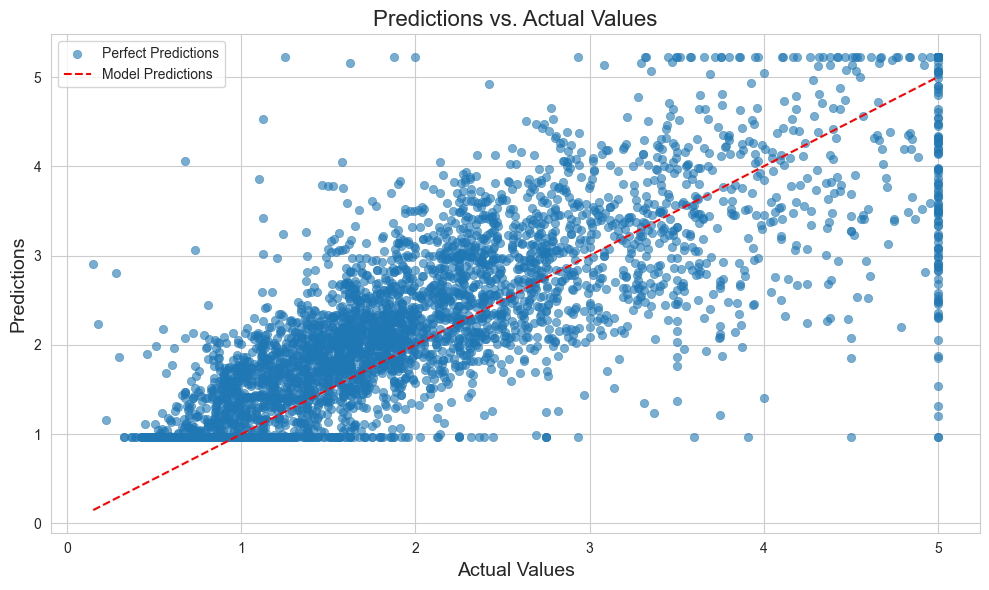

In [29]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a scatter plot with a modern look
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actuals, y=predictions, alpha=0.6, edgecolor=None, palette="viridis")

# Plot the perfect predictions line
min_max_range = [actuals.min(), actuals.max()]
sns.lineplot(x=min_max_range, y=min_max_range, color='red', linestyle='--')

# Adjust more detailed plot settings
plt.title('Predictions vs. Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.legend(labels=['Perfect Predictions', 'Model Predictions'], loc='upper left')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()
